In [1]:
import torch

In [2]:
import numpy as np
import pandas as pd

In [3]:
# 追踪张量梯度 requires_grad = True
x = torch.tensor(2.0,requires_grad = True)
w = torch.randn(1,requires_grad = True)
b = torch.randn(1,requires_grad = True)
y = torch.mul(w,x)
z = torch.add(y,b)
print("x,w,b的requires_grad属性分别为: {},{},{}".format(x.requires_grad,w.requires_grad,b.requires_grad))
print(x)
print("w",w)
print("b",b)
print("y",y)
print("z",z)

x,w,b的requires_grad属性分别为: True,True,True
tensor(2., requires_grad=True)
w tensor([-0.2383], requires_grad=True)
b tensor([0.3898], requires_grad=True)
y tensor([-0.4766], grad_fn=<MulBackward0>)
z tensor([-0.0868], grad_fn=<AddBackward0>)


In [4]:
print("y,z的requires_grad的属性分别为: {},{}".format(y.requires_grad,z.requires_grad))

y,z的requires_grad的属性分别为: True,True


In [5]:
z.backward()

In [6]:
print("参数w,b的梯度分别为 {},{},{}".format(w.grad,b.grad,x.grad))

参数w,b的梯度分别为 tensor([2.]),tensor([1.]),-0.23831678926944733


In [7]:
print("非叶子结点y,z的梯度分别为: {},{}".format(y.grad,z.grad))

非叶子结点y,z的梯度分别为: None,None


<ipython-input-7-d81700fffabe>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print("非叶子结点y,z的梯度分别为: {},{}".format(y.grad,z.grad))


In [8]:
x =torch.tensor(1.0,requires_grad = True)

y1 = x ** 2

with torch.no_grad():
    y2 = x ** 3
y3 = y1 + y2

print(x.requires_grad)
print(y1,y1.requires_grad) # True
print(y2,y2.requires_grad) # False
print(y3,y3.requires_grad) # True

True
tensor(1., grad_fn=<PowBackward0>) True
tensor(1.) False
tensor(2., grad_fn=<AddBackward0>) True


# 反向传播

In [9]:
y3.backward()
print(x.grad)

tensor(2.)


y2没有梯度

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
x1 = torch.linspace(-1,1,100)

In [12]:
x1.shape

torch.Size([100])

In [13]:
x1

tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
        -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
        -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
        -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
        -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
        -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
        -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
         0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
         0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
         0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
         0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
         0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
         0.9394,  0.9596,  0.9798,  1.00

In [14]:
# 返回一个新的张量,在指定的维度上插入数据
x1.unsqueeze(dim = 1)

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

In [15]:
x1

tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
        -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
        -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
        -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
        -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
        -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
        -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
         0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
         0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
         0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
         0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
         0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
         0.9394,  0.9596,  0.9798,  1.00

In [16]:
# _下划线 相当于inplice = True

x1.unsqueeze_(dim = 1)

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

In [17]:
x1

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

In [18]:
x2 = torch.unsqueeze(torch.linspace(-1,1,100),dim = 1)
x2.shape

torch.Size([100, 1])

In [19]:
# 变成了2维
torch.unsqueeze(torch.linspace(-1,1,100),dim = 0)

tensor([[-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
         -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
         -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
         -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
         -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
         -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
         -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
          0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
          0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
          0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
          0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
          0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
          0.9394,  0.9596,  

In [20]:
torch.manual_seed(42)

In [21]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim = 1)

In [22]:
y = 3 * x.pow(2) + 0.2 * torch.rand(x.size()) + 2

In [23]:
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

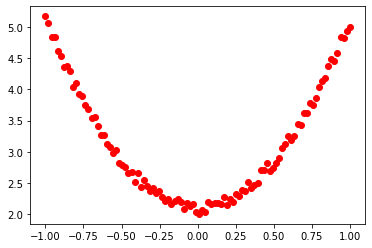

In [24]:
plt.scatter(x.numpy(),y.numpy(),color = 'red',marker = 'o')
plt.show()

In [25]:
w = torch.randn(1,1,requires_grad = True)
b = torch.randn(1,1,requires_grad = True)

In [26]:
eta = 0.001

for i in range(2000):
    y_pred = x.pow(2).mm(w) + b
    loss = 0.5 * ((y_pred -y ) ** 2).sum()
    loss.backward()
    
    with torch.no_grad():
        w -= eta * w.grad
        b -= eta * b.grad
        
        w.grad.zero_()
        b.grad.zero_()

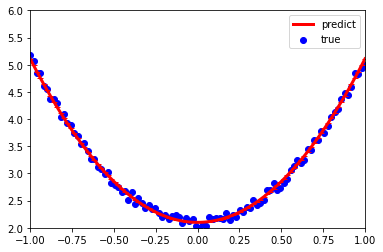

tensor(0.1714, grad_fn=<MulBackward0>)
tensor([[3.0095]], requires_grad=True) tensor([[2.0999]], requires_grad=True)


In [27]:
plt.plot(x.numpy(),y_pred.detach().numpy(),color = 'r',marker = '_',linestyle = '-',linewidth = 3,label = 'predict')
plt.scatter(x.numpy(),y.numpy(),color = 'b',marker = 'o',label = 'true')
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()
plt.show()
print(loss)
print(w,b)

In [28]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
%matplotlib inline

In [29]:
num_fea = 2
num_exa = 1000
true_w = [2,-3.4]
true_b = 4.2
fea = torch.randn(num_exa , num_fea,dtype = torch.float32)
labels = true_w[0] * fea[:,0] + true_w[1] * fea[:,1] + true_b
labels += torch.tensor(np.random.normal(0,0.01,size = labels.size()),dtype = torch.float32)

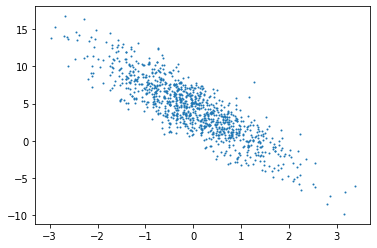

In [30]:
plt.scatter(fea[:,1].numpy(),labels.numpy(),1)
plt.show()

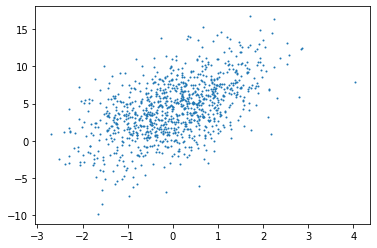

In [31]:
plt.scatter(fea[:,0].numpy(),labels.numpy(),1)
plt.show()

In [32]:
import torch.utils.data as Data
# 处理数据

In [33]:
batch_size = 10

In [34]:
fea

tensor([[-0.6788,  0.5743],
        [ 0.1877, -0.3576],
        [-0.3165,  0.5886],
        ...,
        [ 0.4985,  0.3931],
        [-0.6578,  0.2452],
        [ 0.4116,  0.7411]])

In [35]:
labels

tensor([ 8.8677e-01,  5.7654e+00,  1.5599e+00,  1.0076e+00,  1.8073e+00,
         2.8066e+00,  3.0618e+00,  7.9379e+00,  8.6395e+00,  7.3603e+00,
         3.9180e+00,  3.5988e+00,  1.3531e+00,  4.9204e+00,  6.6554e+00,
         4.0598e+00,  3.6874e+00,  1.5606e+00,  6.0136e+00,  1.7467e+00,
         4.7783e+00,  3.2728e+00,  2.4541e+00, -4.4214e-01,  7.6429e+00,
        -2.1009e+00,  7.8991e+00,  1.5896e+00,  4.7040e+00,  1.5920e+00,
        -1.4326e+00,  8.1785e+00,  7.1639e+00,  1.5333e+00,  1.4599e+00,
         4.3634e+00,  8.3277e+00,  2.5081e+00,  5.1696e+00,  7.2236e-01,
         4.2146e-01,  3.9722e+00,  6.5235e+00,  4.7297e+00,  3.5941e+00,
         2.8635e+00,  3.3103e+00,  5.2460e+00,  5.3194e+00,  6.7305e+00,
         5.6186e+00,  1.9279e+00,  7.3255e+00,  5.3200e+00,  2.8700e+00,
         4.9298e+00,  5.1506e+00,  7.6773e+00, -1.8638e+00,  3.1442e+00,
         7.0664e+00,  4.7088e+00,  4.9428e+00,  7.5429e+00,  3.4818e+00,
         3.4406e-01,  1.2134e+00,  4.9837e+00, -6.5

In [36]:
dataset = Data.TensorDataset(fea,labels)
dataset
# 生成数据集

In [37]:
for i in dataset:
    print(i)

(tensor([-0.6788,  0.5743]), tensor(0.8868))
(tensor([ 0.1877, -0.3576]), tensor(5.7654))
(tensor([-0.3165,  0.5886]), tensor(1.5599))
(tensor([-0.8905,  0.4098]), tensor(1.0076))
(tensor([-0.9864,  0.1233]), tensor(1.8073))
(tensor([0.3499, 0.6173]), tensor(2.8066))
(tensor([-0.1693,  0.2332]), tensor(3.0618))
(tensor([4.0356, 1.2795]), tensor(7.9379))
(tensor([ 1.0311, -0.7048]), tensor(8.6395))
(tensor([ 1.0131, -0.3308]), tensor(7.3603))
(tensor([0.5177, 0.3878]), tensor(3.9180))
(tensor([-0.5797, -0.1691]), tensor(3.5988))
(tensor([-0.5733,  0.5069]), tensor(1.3531))
(tensor([-0.4752, -0.4920]), tensor(4.9204))
(tensor([ 0.2704, -0.5628]), tensor(6.6554))
(tensor([0.6793, 0.4405]), tensor(4.0598))
(tensor([-0.3609, -0.0606]), tensor(3.6874))
(tensor([0.0733, 0.8187]), tensor(1.5606))
(tensor([1.4805, 0.3449]), tensor(6.0136))
(tensor([-1.4241, -0.1163]), tensor(1.7467))
(tensor([ 0.2176, -0.0467]), tensor(4.7783))
(tensor([-1.4335, -0.5665]), tensor(3.2728))
(tensor([-0.4253,  0.2

(tensor([-2.0686,  0.8686]), tensor(-2.8952))
(tensor([ 0.2254, -0.2793]), tensor(5.5963))
(tensor([0.6702, 0.1188]), tensor(5.1258))
(tensor([-0.6119,  0.6026]), tensor(0.9303))
(tensor([-0.8362, -0.3333]), tensor(3.6567))
(tensor([ 0.9772, -1.4153]), tensor(10.9662))
(tensor([-7.8205e-04,  9.2348e-01]), tensor(1.0435))
(tensor([-1.1860,  1.2986]), tensor(-2.5759))
(tensor([ 0.8967, -2.1818]), tensor(13.4245))
(tensor([ 0.8987, -0.1337]), tensor(6.4554))
(tensor([0.6844, 0.7114]), tensor(3.1724))
(tensor([0.3048, 0.5130]), tensor(3.0649))
(tensor([-1.2514, -0.8308]), tensor(4.5098))
(tensor([0.5258, 1.6828]), tensor(-0.4537))
(tensor([0.0967, 0.2571]), tensor(3.5154))
(tensor([0.4728, 0.3640]), tensor(3.9105))
(tensor([-0.2812, -1.0375]), tensor(7.1644))
(tensor([-0.4976, -0.1823]), tensor(3.8446))
(tensor([-0.2120,  0.8162]), tensor(0.9785))
(tensor([ 0.8982, -0.1539]), tensor(6.5113))
(tensor([-0.5682, -0.0868]), tensor(3.3547))
(tensor([-1.2924,  0.1689]), tensor(1.0366))
(tensor([

(tensor([ 0.6467, -2.0813]), tensor(12.5741))
(tensor([-0.9304, -1.3950]), tensor(7.0880))
(tensor([ 0.2753, -1.7002]), tensor(10.5236))
(tensor([0.5674, 0.5813]), tensor(3.3632))
(tensor([0.0301, 1.7702]), tensor(-1.7562))
(tensor([-0.9519,  0.3934]), tensor(0.9666))
(tensor([0.7378, 2.0243]), tensor(-1.2204))
(tensor([-0.2977,  1.5023]), tensor(-1.4952))
(tensor([0.8574, 1.1460]), tensor(2.0262))
(tensor([-0.1131,  1.4093]), tensor(-0.8207))
(tensor([-0.4611,  0.2494]), tensor(2.4299))
(tensor([-1.7671, -0.0146]), tensor(0.7149))
(tensor([-1.6251,  1.4376]), tensor(-3.9424))
(tensor([0.1115, 1.7074]), tensor(-1.3879))
(tensor([-0.9025, -0.2357]), tensor(3.1994))
(tensor([-2.3813,  0.7333]), tensor(-3.0619))
(tensor([ 0.3673, -0.3919]), tensor(6.2766))
(tensor([0.1606, 2.2374]), tensor(-3.0713))
(tensor([-0.5059,  0.1054]), tensor(2.8405))
(tensor([-2.1039,  0.4070]), tensor(-1.3718))
(tensor([-0.7021, -0.6733]), tensor(5.0962))
(tensor([ 0.2071, -0.2613]), tensor(5.4878))
(tensor([1.

(tensor([-0.1470,  0.1218]), tensor(3.4851))
(tensor([-0.1621,  0.4900]), tensor(2.2214))
(tensor([0.9113, 1.7926]), tensor(-0.0792))
(tensor([ 0.3588, -0.2917]), tensor(5.9120))
(tensor([0.5567, 0.6259]), tensor(3.1810))
(tensor([0.9776, 0.7261]), tensor(3.7021))
(tensor([1.2465, 0.6389]), tensor(4.5366))
(tensor([-0.1194,  1.3993]), tensor(-0.8088))
(tensor([-0.1607, -2.2146]), tensor(11.4146))
(tensor([-1.2983, -0.4608]), tensor(3.1827))
(tensor([-0.1727,  0.6042]), tensor(1.8074))
(tensor([-0.3207,  0.1820]), tensor(2.9468))
(tensor([-1.8008, -1.4390]), tensor(5.5085))
(tensor([-1.8759, -1.0305]), tensor(3.9568))
(tensor([ 1.3371, -0.2887]), tensor(7.8420))
(tensor([ 0.7781, -1.4069]), tensor(10.5498))
(tensor([0.4058, 1.8280]), tensor(-1.2058))
(tensor([-1.4416, -0.6342]), tensor(3.4521))
(tensor([-1.9629, -0.6503]), tensor(2.4860))
(tensor([-1.4416, -1.2435]), tensor(5.5658))
(tensor([-1.2267, -0.1497]), tensor(2.2418))
(tensor([-1.2425,  1.4804]), tensor(-3.3173))
(tensor([ 0.63

(tensor([0.3793, 0.9846]), tensor(1.6122))
(tensor([0.6351, 0.2036]), tensor(4.7708))
(tensor([-0.1810, -0.9300]), tensor(7.0016))
(tensor([ 0.4726, -1.0090]), tensor(8.5771))
(tensor([-1.2626, -0.1746]), tensor(2.2754))
(tensor([1.8163, 0.2068]), tensor(7.1377))
(tensor([0.1198, 0.9610]), tensor(1.1736))
(tensor([-1.2074,  0.1799]), tensor(1.1624))
(tensor([-1.9806,  0.6428]), tensor(-1.9534))
(tensor([2.1726, 2.2334]), tensor(0.9361))
(tensor([ 0.2225, -0.9300]), tensor(7.8088))
(tensor([0.3208, 0.0371]), tensor(4.7072))
(tensor([ 0.1709, -0.7267]), tensor(7.0157))
(tensor([-0.0056,  0.3184]), tensor(3.1033))
(tensor([-0.2403, -0.2528]), tensor(4.5924))
(tensor([-0.2337,  1.5783]), tensor(-1.6309))
(tensor([-0.3183, -0.2895]), tensor(4.5599))
(tensor([-0.6660, -1.7441]), tensor(8.8007))
(tensor([ 0.1139, -0.1916]), tensor(5.0864))
(tensor([ 2.5826, -0.6461]), tensor(11.5715))
(tensor([ 0.1423, -0.9354]), tensor(7.6749))
(tensor([1.0502, 0.7995]), tensor(3.5829))
(tensor([ 0.1927, -0.

In [38]:
# 小批量数据大小 batch_size
# shuffle 洗牌
data_iter = Data.DataLoader(dataset,batch_size,shuffle = True)

In [39]:
for x,y in data_iter:
    print(x,y)
#     break

tensor([[ 0.1839, -0.7940],
        [ 1.8537,  0.1717],
        [ 1.3427, -0.1747],
        [ 1.4920,  0.0133],
        [ 1.2868,  0.1466],
        [ 0.3416, -0.2214],
        [ 0.8505, -0.8496],
        [ 0.6702,  0.1188],
        [ 0.5693,  0.7476],
        [-0.2108,  0.8012]]) tensor([7.2821, 7.3178, 7.4835, 7.1403, 6.2867, 5.6568, 8.7852, 5.1258, 2.7965,
        1.0360])
tensor([[-0.2733,  0.5940],
        [-0.0439,  0.2368],
        [-0.1834,  0.3666],
        [-0.7328,  1.1510],
        [ 0.0977,  1.0528],
        [-0.5059,  0.1054],
        [ 0.0733,  0.8187],
        [ 0.6679,  0.6450],
        [-0.0537, -0.7734],
        [ 0.1858, -0.9698]]) tensor([ 1.6145,  3.3103,  2.5885, -1.1756,  0.8172,  2.8405,  1.5606,  3.3405,
         6.7159,  7.8595])
tensor([[ 0.5303, -1.6844],
        [-1.1586, -0.9637],
        [-0.1739,  0.0299],
        [ 1.2704, -0.0750],
        [ 1.0477, -0.3948],
        [-0.8051,  0.5158],
        [-1.2422, -0.3340],
        [-0.7021, -0.6733],
        [ 

        [ 1.5677,  0.4278]]) tensor([ 3.5988, 12.6842,  6.2349,  2.2507,  3.0194,  4.7816,  4.4496,  8.1157,
         4.5546,  5.8922])
tensor([[-0.1706, -0.6141],
        [-1.6580,  3.1505],
        [-1.3391, -2.1181],
        [-1.2924,  0.1689],
        [-1.0223, -0.7084],
        [ 0.3682,  0.7050],
        [ 0.6161, -0.2508],
        [ 0.6930,  1.1980],
        [-1.1766,  1.1889],
        [-0.7576, -0.0756]]) tensor([ 5.9448, -9.8464,  8.7110,  1.0366,  4.5567,  2.5550,  6.3046,  1.5117,
        -2.2064,  2.9488])
tensor([[-0.8343,  0.7486],
        [ 0.3105,  0.3715],
        [ 0.2753, -1.7002],
        [ 0.4049,  0.6319],
        [-0.6753, -0.8104],
        [-1.1883, -0.5416],
        [-0.2337,  0.0605],
        [ 0.8211,  0.9002],
        [ 0.4199, -0.3537],
        [ 1.6462, -0.6937]]) tensor([-0.0142,  3.5402, 10.5236,  2.8700,  5.6061,  3.6666,  3.5224,  2.7754,
         6.2546,  9.8603])
tensor([[ 0.1210,  0.5535],
        [-1.5581,  0.9396],
        [ 1.1300, -1.6129],
    

In [40]:
w = torch.tensor(np.random.normal(0,0.01,(num_fea,1)),dtype = torch.float32)
b = torch.zeros(1,dtype = torch.float32)

In [41]:
w

tensor([[-0.0317],
        [ 0.0058]])

In [42]:
b

tensor([0.])

In [43]:
w.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)

tensor([0.], requires_grad=True)

In [44]:
def linreg(x,w,b):
    return torch.mm(x,w) + b

In [45]:
def qur(y_pred,y):
    return (y_pred - y.view(y_pred.size())) ** 2 / 2

In [46]:
def sgd(params,lr,batch_size):
    for par in params:
#         w -= eta * w.grad
        par.data -= lr * par.grad / batch_size

In [47]:
lr = 0.03
num_epochs = 3
net = linreg
loss = qur

for ep in range(num_epochs):
    for x,y in data_iter:
        l = loss(net(x,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    t_l = loss(net(fea,w,b),labels)
    print('epoch %d, loss %f'% (ep + 1,t_l.mean().item()))

epoch 1, loss 0.033049
epoch 2, loss 0.000112
epoch 3, loss 0.000054


In [48]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
%matplotlib inline

In [49]:
# randn(行,列,类型)
x = torch.randn(1000,2,dtype = torch.float32)
print(x.shape)
x

torch.Size([1000, 2])


tensor([[-0.5702, -0.0539],
        [-0.7307, -1.0347],
        [ 0.4717, -0.3166],
        ...,
        [ 0.8160,  0.2655],
        [-0.0570, -0.1868],
        [ 0.9731, -0.4449]])

In [50]:
true_w = [2,-3.4]
true_b = 4.2

In [51]:
true_w

[2, -3.4]

In [52]:
true_w[0]

2

In [53]:
label = true_w[0] * x[:,0] + true_w[1] * x[:,1] + true_b
label.shape

torch.Size([1000])

In [54]:
label += torch.tensor(np.random.normal(0,0.01,size = label.size()),dtype = torch.float32)
label.shape

torch.Size([1000])

In [55]:
import torch.utils.data as Data

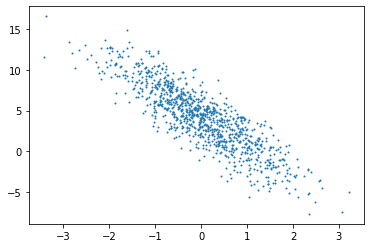

In [56]:
plt.scatter(x[:,1].numpy(),label.numpy(),1)
plt.show()

In [57]:
batch_size = 10

In [58]:
x

tensor([[-0.5702, -0.0539],
        [-0.7307, -1.0347],
        [ 0.4717, -0.3166],
        ...,
        [ 0.8160,  0.2655],
        [-0.0570, -0.1868],
        [ 0.9731, -0.4449]])

In [59]:
label

tensor([ 3.2454e+00,  6.2441e+00,  6.2202e+00,  1.7859e+00, -2.2434e+00,
         3.9058e+00,  6.1311e+00,  3.1802e+00,  5.4182e+00,  7.8736e+00,
         7.7181e+00,  1.2454e+00,  1.1761e+00,  1.9533e+00,  6.6435e+00,
         6.9267e+00,  4.4061e+00,  1.0293e+01,  9.5901e+00,  7.2988e+00,
         8.1680e+00,  2.9959e+00, -1.7476e+00,  1.3052e+01,  3.6213e+00,
         6.3737e+00,  6.4394e+00,  4.4741e+00,  8.5986e+00,  4.5242e+00,
         1.0906e+01,  1.1018e+01,  5.0658e+00,  1.3173e+00,  4.6395e+00,
         1.0002e+01,  1.5863e+00,  6.1227e+00, -1.0034e+00,  7.2572e+00,
         6.2589e+00,  1.4965e+01,  3.2085e+00,  5.1423e+00,  6.5121e+00,
         8.4664e+00,  8.0948e-01,  2.3055e+00,  5.0736e+00,  6.7824e+00,
         4.8503e+00,  4.1463e+00,  7.8165e+00,  3.2827e+00, -4.9133e+00,
         4.2634e+00,  1.1351e+00,  4.8550e-01,  3.7632e+00,  2.7370e+00,
         1.1157e+00,  5.3336e-01,  8.2343e+00,  1.6030e+00,  5.0017e+00,
         5.7168e+00,  2.0019e+00,  9.5495e+00, -2.0

In [60]:
dataset = Data.TensorDataset(x,label)
dataset

In [61]:
for i in dataset:
    print(i)

(tensor([-0.5702, -0.0539]), tensor(3.2454))
(tensor([-0.7307, -1.0347]), tensor(6.2441))
(tensor([ 0.4717, -0.3166]), tensor(6.2202))
(tensor([-1.2460, -0.0251]), tensor(1.7859))
(tensor([0.7312, 2.3289]), tensor(-2.2434))
(tensor([-1.0620, -0.5386]), tensor(3.9058))
(tensor([ 0.0513, -0.5355]), tensor(6.1311))
(tensor([0.3627, 0.5143]), tensor(3.1802))
(tensor([1.6084, 0.5863]), tensor(5.4182))
(tensor([ 0.1576, -0.9828]), tensor(7.8736))
(tensor([ 0.5713, -0.6984]), tensor(7.7181))
(tensor([-0.2921,  0.7003]), tensor(1.2454))
(tensor([-1.2116,  0.1757]), tensor(1.1761))
(tensor([0.2550, 0.8070]), tensor(1.9533))
(tensor([ 0.4391, -0.4657]), tensor(6.6435))
(tensor([ 0.2104, -0.6723]), tensor(6.9267))
(tensor([-0.0515, -0.0902]), tensor(4.4061))
(tensor([ 0.9585, -1.2276]), tensor(10.2932))
(tensor([-0.8988, -2.1180]), tensor(9.5901))
(tensor([ 0.4666, -0.6360]), tensor(7.2988))
(tensor([-0.0593, -1.2026]), tensor(8.1680))
(tensor([-1.2769, -0.3968]), tensor(2.9959))
(tensor([-0.3110

(tensor([0.2615, 1.6954]), tensor(-1.0427))
(tensor([-0.0872,  2.0595]), tensor(-2.9581))
(tensor([-0.4368,  0.3443]), tensor(2.1415))
(tensor([-0.5315, -1.7879]), tensor(9.2156))
(tensor([ 0.8045, -2.0439]), tensor(12.7480))
(tensor([-1.5919, -0.7699]), tensor(3.6249))
(tensor([ 0.7542, -1.7302]), tensor(11.6024))
(tensor([-0.6405, -0.0244]), tensor(2.9969))
(tensor([-0.2835,  0.3756]), tensor(2.3437))
(tensor([-3.1612,  1.0446]), tensor(-5.6778))
(tensor([ 0.5374, -0.4842]), tensor(6.8959))
(tensor([-1.1633,  0.3276]), tensor(0.7571))
(tensor([ 0.6135, -1.8123]), tensor(11.5840))
(tensor([ 0.5734, -1.0991]), tensor(9.0858))
(tensor([-0.8741, -1.0332]), tensor(5.9780))
(tensor([-0.4152,  1.5586]), tensor(-1.9161))
(tensor([ 1.9539, -0.0285]), tensor(8.2039))
(tensor([ 0.5961, -2.1706]), tensor(12.7658))
(tensor([-0.2583,  0.2814]), tensor(2.7180))
(tensor([-0.5159,  1.5220]), tensor(-2.0146))
(tensor([-2.0670, -0.1166]), tensor(0.4750))
(tensor([0.6193, 1.2309]), tensor(1.2501))
(tens

(tensor([ 0.9158, -0.5320]), tensor(7.8550))
(tensor([0.9131, 0.3907]), tensor(4.7042))
(tensor([0.8079, 0.5629]), tensor(3.8854))
(tensor([ 0.4628, -0.6264]), tensor(7.2662))
(tensor([-1.3772, -1.6635]), tensor(7.1125))
(tensor([ 0.5958, -0.2021]), tensor(6.0877))
(tensor([-0.9015, -0.2661]), tensor(3.2986))
(tensor([ 0.3514, -0.9149]), tensor(8.0340))
(tensor([-0.2865,  1.8737]), tensor(-2.7260))
(tensor([ 0.9759, -0.0011]), tensor(6.1592))
(tensor([-2.9853,  0.5707]), tensor(-3.6993))
(tensor([-1.0649,  0.4575]), tensor(0.5170))
(tensor([ 0.1544, -0.7442]), tensor(7.0474))
(tensor([-0.5760,  0.0104]), tensor(3.0062))
(tensor([-0.2940, -0.9041]), tensor(6.6861))
(tensor([ 0.9907, -0.9967]), tensor(9.5784))
(tensor([-2.3043, -1.8701]), tensor(5.9515))
(tensor([0.8291, 1.5585]), tensor(0.5586))
(tensor([0.8530, 0.8961]), tensor(2.8619))
(tensor([-0.7095,  0.2479]), tensor(1.9503))
(tensor([0.7445, 1.5205]), tensor(0.5079))
(tensor([ 0.4732, -1.3371]), tensor(9.6896))
(tensor([0.6854, 0

(tensor([-1.7339,  0.1151]), tensor(0.3353))
(tensor([ 0.3383, -0.4023]), tensor(6.2525))
(tensor([0.4954, 0.2225]), tensor(4.4533))
(tensor([1.4182, 0.8785]), tensor(4.0567))
(tensor([1.7132, 0.5062]), tensor(5.8991))
(tensor([ 0.9787, -0.0689]), tensor(6.3930))
(tensor([ 0.4922, -0.9136]), tensor(8.2739))
(tensor([ 1.2085, -2.0802]), tensor(13.6856))
(tensor([ 0.8233, -0.5484]), tensor(7.7197))
(tensor([ 0.9550, -0.6852]), tensor(8.4567))
(tensor([1.5755, 1.0448]), tensor(3.7886))
(tensor([-1.4414,  1.4537]), tensor(-3.6343))
(tensor([ 1.2043, -0.9513]), tensor(9.8400))
(tensor([-0.3901,  0.3728]), tensor(2.1619))
(tensor([-1.0881, -1.3815]), tensor(6.7140))
(tensor([-0.8157,  0.7114]), tensor(0.1459))
(tensor([-0.2421,  0.9910]), tensor(0.3606))
(tensor([0.6992, 0.2707]), tensor(4.6823))
(tensor([ 0.1594, -0.4165]), tensor(5.9549))
(tensor([ 1.2599, -0.6336]), tensor(8.8824))
(tensor([-0.8656,  0.2854]), tensor(1.5096))
(tensor([0.8676, 0.9689]), tensor(2.6293))
(tensor([-0.0261, -0

(tensor([-0.8533, -0.5987]), tensor(4.5392))
(tensor([-0.2987, -0.7190]), tensor(6.0259))
(tensor([-1.5592,  0.1025]), tensor(0.7170))
(tensor([0.4553, 0.8192]), tensor(2.3146))
(tensor([0.2963, 0.1716]), tensor(4.2088))
(tensor([ 0.8127, -0.6369]), tensor(7.9885))
(tensor([-1.4308,  0.4312]), tensor(-0.1181))
(tensor([-1.2115, -0.2603]), tensor(2.6656))
(tensor([-0.8325, -0.9412]), tensor(5.7423))
(tensor([-0.8664,  0.3974]), tensor(1.1192))
(tensor([ 1.0028, -0.2359]), tensor(7.0124))
(tensor([0.1420, 0.3962]), tensor(3.1151))
(tensor([-0.0102,  0.9779]), tensor(0.8532))
(tensor([ 0.0749, -1.8820]), tensor(10.7466))
(tensor([-0.4810,  0.2362]), tensor(2.4216))
(tensor([-1.3769, -2.1812]), tensor(8.8609))
(tensor([-2.1615, -0.5392]), tensor(1.7069))
(tensor([ 0.3041, -0.3503]), tensor(5.9839))
(tensor([ 0.0524, -1.6261]), tensor(9.8276))
(tensor([0.3115, 1.7185]), tensor(-1.0280))
(tensor([1.0919, 1.9016]), tensor(-0.0873))
(tensor([-0.2994,  0.2432]), tensor(2.7744))
(tensor([0.4184,

In [62]:
data_i = Data.DataLoader(dataset,batch_size,shuffle = True)

In [63]:
for xxx,y in data_i:
    print(xxx,y)

tensor([[ 1.5392, -0.8462],
        [-0.8533, -0.5987],
        [ 0.6890,  0.6481],
        [-0.2442, -0.2664],
        [ 0.9317, -1.0990],
        [-0.6272,  0.7659],
        [ 1.9495, -1.5725],
        [-0.2921,  0.7003],
        [-0.3403, -0.2152],
        [ 0.6237,  1.4959]]) tensor([10.1492,  4.5392,  3.3669,  4.6175,  9.8034,  0.3465, 13.4632,  1.2454,
         4.2670,  0.3635])
tensor([[ 0.9412, -0.1123],
        [ 0.1309, -0.0077],
        [ 0.6143,  0.9892],
        [-2.2591,  0.0713],
        [-2.3553,  1.2468],
        [ 0.5042,  0.4558],
        [ 0.7156, -0.6388],
        [-0.1321, -0.2021],
        [ 0.9907, -0.9967],
        [-1.2460, -0.0251]]) tensor([ 6.4628,  4.4741,  2.0625, -0.5623, -4.7505,  3.6482,  7.8004,  4.6219,
         9.5784,  1.7859])
tensor([[ 1.5614,  0.2290],
        [-0.0341,  1.5096],
        [ 0.8127, -0.6369],
        [ 0.9131,  0.3907],
        [ 0.4666, -0.6360],
        [ 1.3263,  0.2812],
        [-2.2500, -0.5811],
        [ 0.7380,  1.5021],


In [64]:
w = torch.tensor(np.random.normal(0,0.01,(2,1)),dtype = torch.float32,requires_grad = True)
b = torch.zeros(1,dtype = torch.float32,requires_grad = True)

In [65]:
w

tensor([[0.0148],
        [0.0080]], requires_grad=True)

In [66]:
b

tensor([0.], requires_grad=True)

In [67]:
b.shape

torch.Size([1])

In [68]:
def linreg(x,w,b):
    return torch.mm(x,w) + b

def qur(y_pred,y):
    return (y_pred - y.view(y_pred.size())) ** 2 / 2

def sgd(params,lr,batch_size):
    for par in params:
#         w -= eta * w.grad
        par.data -= lr * par.grad / batch_size

In [69]:
lr = 0.03 # 学习率
num_epochs = 3 # 大循环次数
net = linreg # 假设函数
loss = qur 

In [70]:
x

tensor([[-0.5702, -0.0539],
        [-0.7307, -1.0347],
        [ 0.4717, -0.3166],
        ...,
        [ 0.8160,  0.2655],
        [-0.0570, -0.1868],
        [ 0.9731, -0.4449]])

In [71]:
label

tensor([ 3.2454e+00,  6.2441e+00,  6.2202e+00,  1.7859e+00, -2.2434e+00,
         3.9058e+00,  6.1311e+00,  3.1802e+00,  5.4182e+00,  7.8736e+00,
         7.7181e+00,  1.2454e+00,  1.1761e+00,  1.9533e+00,  6.6435e+00,
         6.9267e+00,  4.4061e+00,  1.0293e+01,  9.5901e+00,  7.2988e+00,
         8.1680e+00,  2.9959e+00, -1.7476e+00,  1.3052e+01,  3.6213e+00,
         6.3737e+00,  6.4394e+00,  4.4741e+00,  8.5986e+00,  4.5242e+00,
         1.0906e+01,  1.1018e+01,  5.0658e+00,  1.3173e+00,  4.6395e+00,
         1.0002e+01,  1.5863e+00,  6.1227e+00, -1.0034e+00,  7.2572e+00,
         6.2589e+00,  1.4965e+01,  3.2085e+00,  5.1423e+00,  6.5121e+00,
         8.4664e+00,  8.0948e-01,  2.3055e+00,  5.0736e+00,  6.7824e+00,
         4.8503e+00,  4.1463e+00,  7.8165e+00,  3.2827e+00, -4.9133e+00,
         4.2634e+00,  1.1351e+00,  4.8550e-01,  3.7632e+00,  2.7370e+00,
         1.1157e+00,  5.3336e-01,  8.2343e+00,  1.6030e+00,  5.0017e+00,
         5.7168e+00,  2.0019e+00,  9.5495e+00, -2.0

In [72]:
for ep in range(num_epochs):
    for xx,y in data_i:
        l = loss(net(xx,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    t_l = loss(net(x,w,b),label)
    print('epoch %d, loss %f'% (ep + 1,t_l.mean().item()))

epoch 1, loss 0.039905
epoch 2, loss 0.000154
epoch 3, loss 0.000051


In [73]:
print(true_w)
print(w)
print(true_b,b)

[2, -3.4]
tensor([[ 1.9999],
        [-3.3996]], requires_grad=True)
4.2 tensor([4.1996], requires_grad=True)
